In [99]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [100]:
img = cv2.imread("/home/ayush/ishu/Sport_person_classifier/model/test_image/Aufmacher-Sharapova.jpg")
img.shape


(1089, 1935, 3)

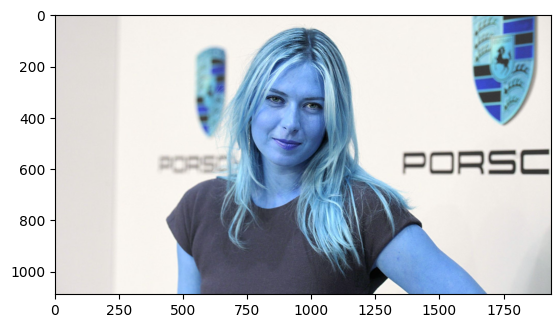

In [101]:
plt.imshow(img)

In [102]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1089, 1935)

In [103]:
gray

array([[213, 213, 213, ..., 227, 227, 228],
       [214, 214, 214, ..., 227, 227, 228],
       [215, 215, 215, ..., 227, 227, 228],
       ...,
       [218, 218, 218, ..., 180, 180, 180],
       [218, 218, 218, ..., 180, 180, 180],
       [218, 218, 218, ..., 180, 180, 180]],
      shape=(1089, 1935), dtype=uint8)

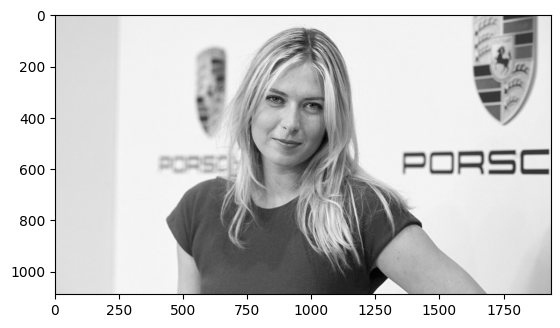

In [104]:
plt.imshow(gray,cmap="gray")

In [105]:
face_cascade = cv2.CascadeClassifier('/home/ayush/ishu/Sport_person_classifier/model/open.ui/haarcascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/home/ayush/ishu/Sport_person_classifier/model/open.ui/haarcascade/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces



array([[714, 186, 420, 420]], dtype=int32)

In [106]:
(X,y,w,h) =faces[0]
X,y,w,h

(np.int32(714), np.int32(186), np.int32(420), np.int32(420))

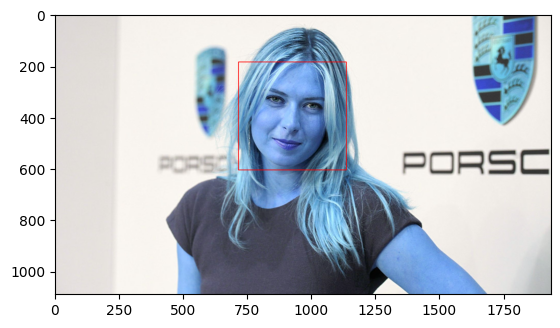

In [107]:
face_img = cv2.rectangle(img,(X,y),(X+w,y+h),(555,1,0),2)
plt.imshow(face_img)

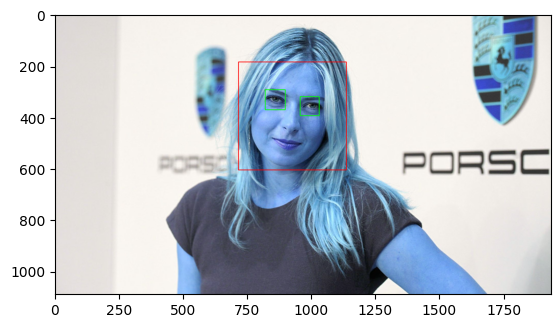

In [108]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255721,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='grey')
plt.show()


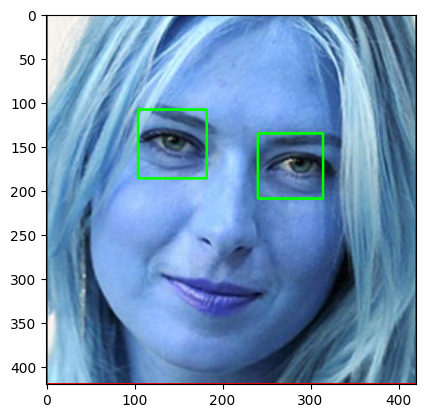

In [109]:
%matplotlib inline
plt.imshow(roi_color,cmap="gray")

In [110]:
cropped_img = np.array(roi_color)
cropped_img.shape

(420, 420, 3)

In [111]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

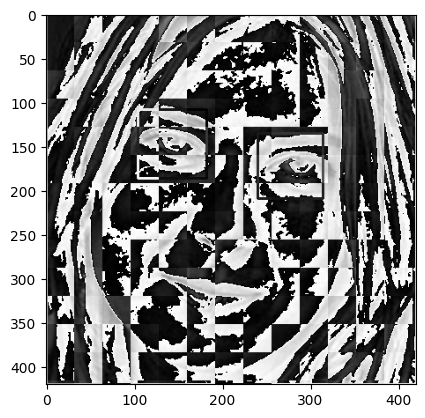

In [112]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [113]:
import cv2

# Load the pre-trained classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

def get_cropped_image_if_2_eyes(image_path):
    print(f"Loading image: {image_path}")  # Show which image is being processed
    
    img = cv2.imread(image_path)
    if img is None:
        print("❌ Failed to load image.")
        return None

    # Convert to grayscale for face and eye detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        print("😕 No faces found.")
        return None

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes) >= 2:
            print("✅ Face with 2 eyes detected.")
            return roi_color

    print("❌ Face found, but less than 2 eyes detected.")
    return None


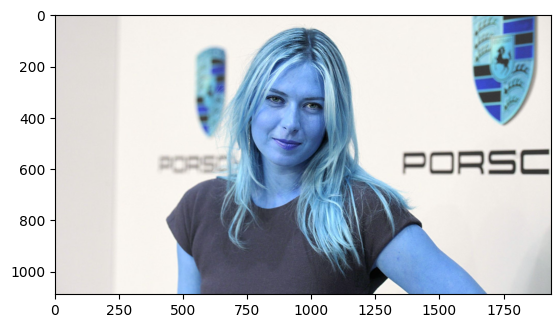

In [114]:
original_image = cv2.imread("/home/ayush/ishu/Sport_person_classifier/model/test_image/Aufmacher-Sharapova.jpg")
plt.imshow(original_image)


Loading image: /home/ayush/ishu/Sport_person_classifier/model/test_image/Aufmacher-Sharapova.jpg
✅ Face with 2 eyes detected.


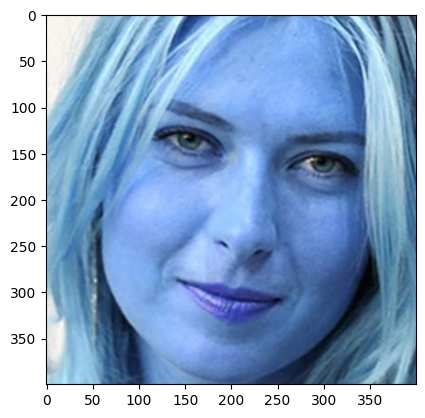

In [115]:
cropped_image = get_cropped_image_if_2_eyes("/home/ayush/ishu/Sport_person_classifier/model/test_image/Aufmacher-Sharapova.jpg")
plt.imshow(cropped_image)

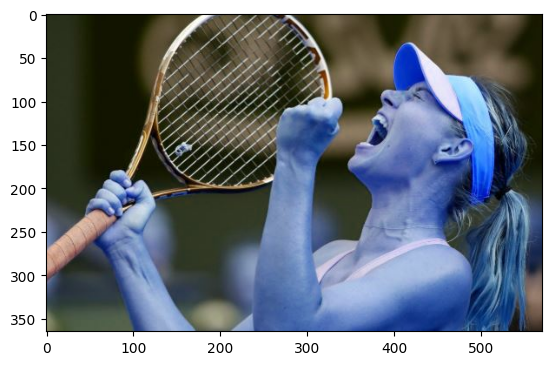

In [116]:
org_image_obstructed = cv2.imread("/home/ayush/ishu/Sport_person_classifier/model/test_image/sharapova2.JPG")
plt.imshow(org_image_obstructed)

In [117]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('/home/ayush/ishu/Sport_person_classifier/model/test_image/sharapova2.JPG')
cropped_image_no_2_eyes



Loading image: /home/ayush/ishu/Sport_person_classifier/model/test_image/sharapova2.JPG
❌ Face found, but less than 2 eyes detected.


In [118]:
path_to_data = "/home/ayush/ishu/Sport_person_classifier/model/dataset"
path_to_cr_data = "/home/ayush/ishu/Sport_person_classifier/model/dataset/croped"


In [119]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [120]:
img_dirs


['/home/ayush/ishu/Sport_person_classifier/model/dataset/sachin tendulkar - Google Search',
 '/home/ayush/ishu/Sport_person_classifier/model/dataset/mithali raj - Google Search',
 '/home/ayush/ishu/Sport_person_classifier/model/dataset/maria sharapova - Google Search',
 '/home/ayush/ishu/Sport_person_classifier/model/dataset/MS Dhoni',
 '/home/ayush/ishu/Sport_person_classifier/model/dataset/virat kohli - Google Search']

In [121]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)


In [122]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

sachin tendulkar - Google Search
Loading image: /home/ayush/ishu/Sport_person_classifier/model/dataset/sachin tendulkar - Google Search/Surya-Sachin-0705-IPL.jpg
❌ Face found, but less than 2 eyes detected.
Loading image: /home/ayush/ishu/Sport_person_classifier/model/dataset/sachin tendulkar - Google Search/Sachin-Tendulkar__28cropped_29.jpg
✅ Face with 2 eyes detected.
Generating cropped images in folder:  /home/ayush/ishu/Sport_person_classifier/model/dataset/cropedsachin tendulkar - Google Search
Loading image: /home/ayush/ishu/Sport_person_classifier/model/dataset/sachin tendulkar - Google Search/99705823.jpg


❌ Face found, but less than 2 eyes detected.
Loading image: /home/ayush/ishu/Sport_person_classifier/model/dataset/sachin tendulkar - Google Search/Sachin-Tendulkar-a-Insta-sachintendulkar.jpg
❌ Face found, but less than 2 eyes detected.
Loading image: /home/ayush/ishu/Sport_person_classifier/model/dataset/sachin tendulkar - Google Search/HD-wallpaper-sachin-tendulkar-bowling-cricket-god-legend-thumbnail.jpg
❌ Face found, but less than 2 eyes detected.
Loading image: /home/ayush/ishu/Sport_person_classifier/model/dataset/sachin tendulkar - Google Search/109494009.jpg
❌ Face found, but less than 2 eyes detected.
Loading image: /home/ayush/ishu/Sport_person_classifier/model/dataset/sachin tendulkar - Google Search/49855c5a45d532883cd5efe2b79332cb.jpg
❌ Face found, but less than 2 eyes detected.
Loading image: /home/ayush/ishu/Sport_person_classifier/model/dataset/sachin tendulkar - Google Search/30sachin-tendulkar.jpg
✅ Face with 2 eyes detected.
Loading image: /home/ayush/ishu/Sport_per

libpng warning: iCCP: known incorrect sRGB profile


✅ Face with 2 eyes detected.
Loading image: /home/ayush/ishu/Sport_person_classifier/model/dataset/MS Dhoni/20250507212116_MS-Dhoni-BCCI.jpg:Zone.Identifier
❌ Failed to load image.
Loading image: /home/ayush/ishu/Sport_person_classifier/model/dataset/MS Dhoni/Bengaluru-go-top-of-the-IPL-after-epic-two-run-win-over-Chennai.jpg:Zone.Identifier
❌ Failed to load image.
Loading image: /home/ayush/ishu/Sport_person_classifier/model/dataset/MS Dhoni/MS_Dhoni_1746525520413_1746525520595.jpg:Zone.Identifier
❌ Failed to load image.
Loading image: /home/ayush/ishu/Sport_person_classifier/model/dataset/MS Dhoni/Rahane-and-Dhoni.jpg:Zone.Identifier
❌ Failed to load image.
Loading image: /home/ayush/ishu/Sport_person_classifier/model/dataset/MS Dhoni/lucknow-chennai-super-kings-captain-ms-dhoni-goes-for-a-sixer-during-an-indian-.jpg
😕 No faces found.
Loading image: /home/ayush/ishu/Sport_person_classifier/model/dataset/MS Dhoni/ms_dhoni_chetan_1746679879446_1746679886511.png
😕 No faces found.
Loadin

In [123]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'cropedsachin tendulkar - Google Search': ['/home/ayush/ishu/Sport_person_classifier/model/dataset/cropedsachin tendulkar - Google Search/sachin tendulkar - Google Search1.png',
  '/home/ayush/ishu/Sport_person_classifier/model/dataset/cropedsachin tendulkar - Google Search/sachin tendulkar - Google Search28.png',
  '/home/ayush/ishu/Sport_person_classifier/model/dataset/cropedsachin tendulkar - Google Search/sachin tendulkar - Google Search24.png',
  '/home/ayush/ishu/Sport_person_classifier/model/dataset/cropedsachin tendulkar - Google Search/sachin tendulkar - Google Search8.png',
  '/home/ayush/ishu/Sport_person_classifier/model/dataset/cropedsachin tendulkar - Google Search/sachin tendulkar - Google Search15.png',
  '/home/ayush/ishu/Sport_person_classifier/model/dataset/cropedsachin tendulkar - Google Search/sachin tendulkar - Google Search10.png',
  '/home/ayush/ishu/Sport_person_classifier/model/dataset/cropedsachin tendulkar - Google Search/sachin tendulkar - Google Search11.

In [124]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cropedsachin tendulkar - Google Search': 0,
 'cropedmithali raj - Google Search': 1,
 'cropedmaria sharapova - Google Search': 2,
 'cropedMS Dhoni': 3,
 'cropedvirat kohli - Google Search': 4}

In [125]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [126]:
len(X[0])

4096

In [127]:
32*32*3 + 32*32

4096

In [128]:
X[0]

array([[174],
       [ 81],
       [ 88],
       ...,
       [200],
       [204],
       [208]], shape=(4096, 1), dtype=uint8)

In [129]:
y[0]

0

In [130]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(211, 4096)

In [137]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6226415094339622

In [139]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.40      0.25      0.31         8
           1       0.71      0.94      0.81        18
           2       0.38      0.71      0.50         7
           3       0.67      0.18      0.29        11
           4       0.88      0.78      0.82         9

    accuracy                           0.62        53
   macro avg       0.61      0.57      0.55        53
weighted avg       0.64      0.62      0.59        53



In [140]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [141]:
model_params ={
    "svm": {
        "model" : svm.SVC(gamma="auto",probability=True),
        "param" : {
            "svc__C":[1,10,100,1000],
            "svc__kernel" : ["rbf","linear"]
        }
    },
    "random_forest" : {
        "model" : RandomForestClassifier(),
        "param" :{
            "randomforestclassifier__n_estimators":[1,5,10]
        }
    },
    "logistic_regression" : {
        "model" : LogisticRegression(solver="liblinear",multi_class="auto"),
        "param" : {
            "logisticregression__C" : [1,5,10]
        }
    } 
}

In [142]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['param'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/home/ayush/miniconda3/envs/mlaz/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/ayush/miniconda3/envs/mlaz/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/ayush/miniconda3/envs/mlaz/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/ayush/miniconda3/envs/mlaz/lib/python3.12/site-packages/sklearn/linear_mo

,model,best_score,best_params
0,svm,0.734476,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.525403,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.772177,{'logisticregression__C': 1}


In [143]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [144]:
best_estimators['svm'].score(X_test,y_test)

0.6415094339622641

In [145]:
best_estimators['random_forest'].score(X_test,y_test)

0.49056603773584906

In [146]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6037735849056604

In [147]:
best_clf = best_estimators['svm']


In [148]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 4,  0,  3,  1,  0],
       [ 0, 17,  0,  1,  0],
       [ 3,  1,  3,  0,  0],
       [ 2,  1,  3,  4,  1],
       [ 2,  0,  1,  0,  6]])

Text(95.72222222222221, 0.5, 'Truth')

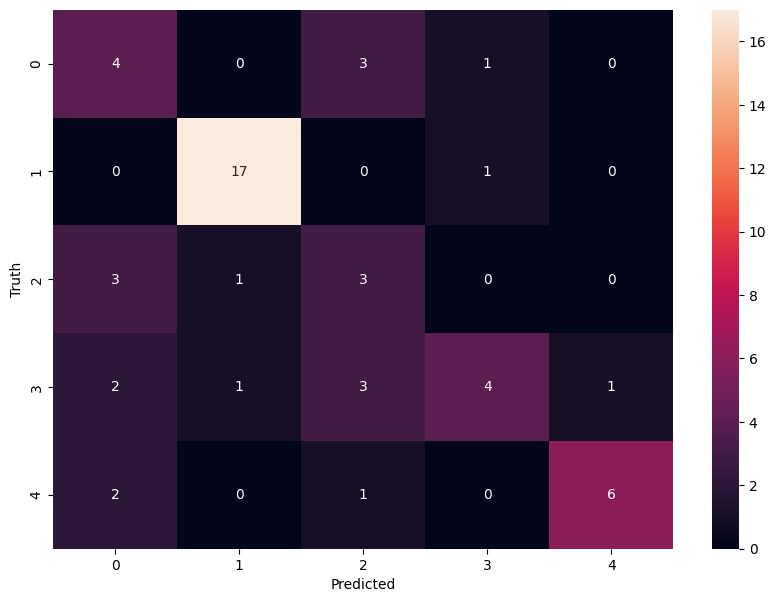

In [149]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [150]:
class_dict

{'cropedsachin tendulkar - Google Search': 0,
 'cropedmithali raj - Google Search': 1,
 'cropedmaria sharapova - Google Search': 2,
 'cropedMS Dhoni': 3,
 'cropedvirat kohli - Google Search': 4}

In [151]:
import joblib
# save the model as a pickle in a file
joblib.dump(best_clf,"saved_model.pkl")

['saved_model.pkl']

In [152]:
import json
with open("class_dictinary.json","w") as f:
    f.write(json.dumps(class_dict))
    
    